In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [26]:
employments = pd.read_csv('Dataset/employment.csv', skiprows=10)
GDP = pd.read_csv('Dataset/gross domestic product (gdp) state  north carolina (dollars).csv')

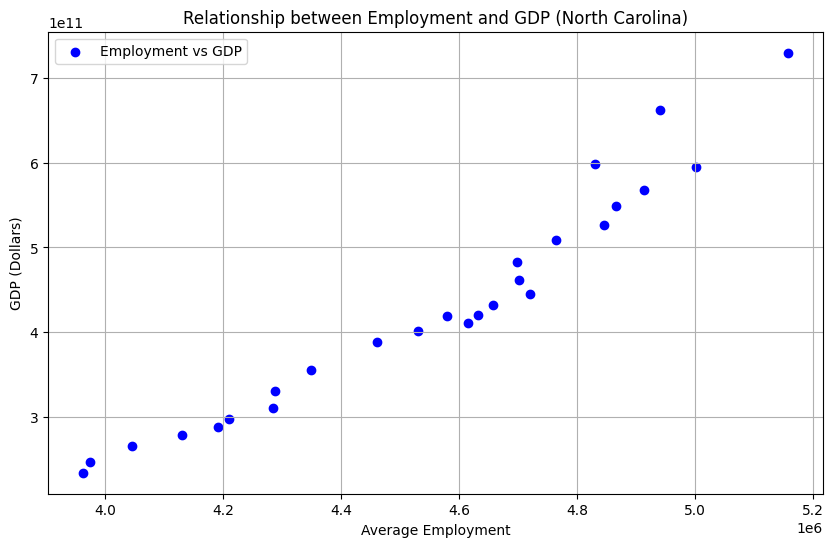

In [27]:


# Load datasets
employments = pd.read_csv('Dataset/employment.csv', skiprows=10)
GDP = pd.read_csv('Dataset/gross domestic product (gdp) state  north carolina (dollars).csv')

# Calculate the average employment for each year
employments['Average Employment'] = employments.iloc[:, 1:13].mean(axis=1)

# Extract only relevant columns
employment_data = employments[['Year', 'Average Employment']]
GDP_data = GDP.rename(columns={"Years": "Year"})

# Merge datasets on 'Year'
merged_data = pd.merge(employment_data, GDP_data, on='Year', how='inner')

# Plotting the relation between employment and GDP
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['Average Employment'], merged_data['North Carolina'], color='blue', label='Employment vs GDP')
plt.title("Relationship between Employment and GDP (North Carolina)")
plt.xlabel("Average Employment")
plt.ylabel("GDP (Dollars)")
plt.grid(True)
plt.legend()
plt.show()


/Users/wangpeng/miniforge3/envs/tableau/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


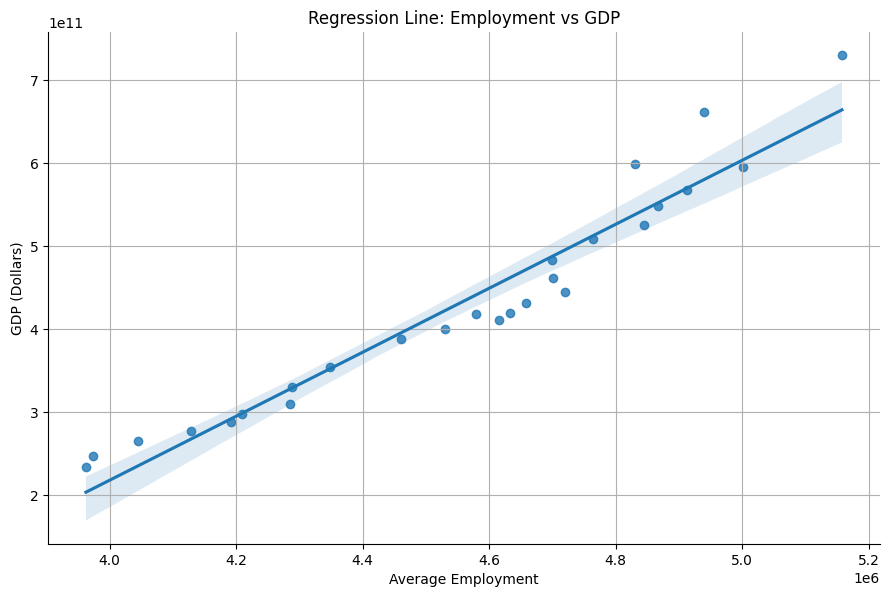

In [30]:
sns.lmplot(x='Average Employment', y='North Carolina', data=merged_data, height=6, aspect=1.5)
plt.title('Regression Line: Employment vs GDP')
plt.xlabel('Average Employment')
plt.ylabel('GDP (Dollars)')
plt.grid(True)
plt.show()
